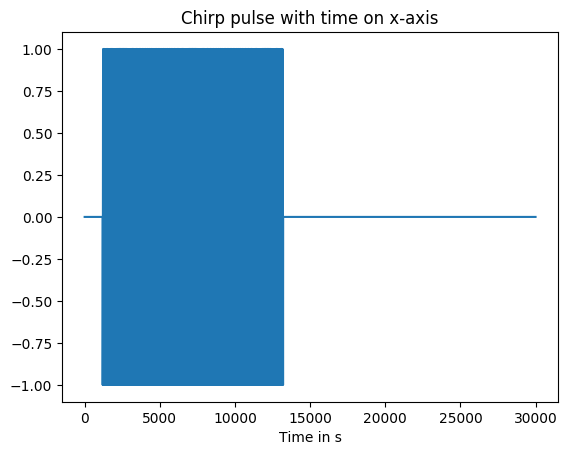

30000


PyObject Text(0.5, 24.0, 'Time in s')

In [3]:
using PyPlot

c = 343;          # Speed of sound in air in m/s
fs = 2e6;       # This is the sample rate of the sonar.
dt = 1/fs;        # This is the sample spacing
r_max = 10;        # Maximum range in metres to which to simulate.
t_max = 2*r_max/c;    # Time delay to max range

# Create an array containing the time values of the samples
t = collect(0:dt:t_max);    # t=0:dt:t_max defines a “range”.
# Create an array containing the range values of the samples
r = c*t/2;        

# NOW create the chirp pulse, shifted by an amount td, to start at 
# some time td-T/2>0.  
f0 = 40000;       # Centre frequency is 0 kHz
B = 2000;         # Chirp bandwidth
T = 6E-3;         # Chirp pulse length
K = B/T;          # Chirp rate

# Define a simple a rect() function which returns for -0.5<=t<=0.5 or 0. 
# The function will work if t is an array of values.
rect(t) = (abs.(t) .<= 0.5)*1.0

# rect(t/T) spans the interval [-T/2,T/2]
# We must therefore delay the chirp pulse so that it starts after t=0.
# Shift the chirp pulse by 0.6T units to the right, so that it starts at 0.1*T

td = 0.6*T;   # Chirp delay

# Note: one can use the macro “@.” to avoid having to put “.” for arrays:
# @. v_tx = cos( 2*pi*(f0*(t-td) + 0.5*K*(t-td).^2) ).*rect((t-td)/T);

v_tx = cos.( 2*pi*(f0*(t .- td) + 0.5*K*(t .- td).^2) ) .* rect.((t .-td)/T);

v_tx = v_tx[1:30000]
println(length(v_tx));

figure("Chirp pulse with time on x-axis")
plot(v_tx)       # Put time on x-axis
title("Chirp pulse with time on x-axis")
xlabel("Time in s")